In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = 14
import time, copy,os
from numpy import pi, sin, cos, tan
import control
from numpy.fft import fft

In [2]:
import os

In [3]:
import pylab_util as PU

In [4]:
import serial

In [5]:
import serial_utils

In [6]:
import importlib

In [7]:
importlib.reload(serial_utils)

<module 'serial_utils' from '/home/ryanwkrauss/git/research/serial_utils.py'>

In [8]:
import re

In [9]:
p = re.compile("^[0-9.]+,.*")

In [10]:
def data_to_float_array(data):
    mylist = data.split('\n')

    for i, rowstr in enumerate(mylist):
        if p.search(rowstr) is not None:
            #this is the start row
            start_ind = i
            break
                
    # search backwards for '#end'
    N = len(mylist)
    for i in range(1,N):
        ind = N-i
        rowstr = mylist[ind]
        if p.search(rowstr) is not None:
            end_ind = ind
            break
    
    clean_list = mylist[start_ind:end_ind]
    clean_2 = list(filter(None,clean_list))
    nested_list = [row.split(',') for row in clean_2]
    str_array = np.array(nested_list)
    float_array = str_array.astype(float)
    return float_array

In [11]:
pwd

'/home/ryanwkrauss/sabbatical_github_work/arduino_oop_block_diagram'

In [12]:
ls /dev/tty*

/dev/tty  /dev/ttyACM0


## Get the portname

In [13]:
for i in range(10):
    portname = "/dev/ttyACM%i" % i
    if os.path.exists(portname):
        break
print("portname: %s" % portname)

portname: /dev/ttyACM0


In [14]:
ser = serial_utils.serial_test(portname)

In [15]:
ser.open()

In [16]:
ser.print_all()

Cart Pendulum Autogen 1
using rtblockdiagram library
enter any character to start a test



In [17]:
ser.flush()

In [18]:
ser.write_char('s')

In [19]:
data = ser.get_data()

In [20]:
data2 = ser.get_data()

In [21]:
data += data2

In [22]:
print(data)

t0 =5386204
1.97,0,-44
12.02,0,-44
22.06,0,-44
32.11,0,-44
42.16,0,-44
52.21,0,-44
62.26,0,-44
72.30,0,-44
82.35,0,-44
92.40,0,-44
102.45,200,-44
112.50,200,-44
122.54,200,-43
132.59,200,-42
142.64,200,-41
152.69,200,-39
162.74,200,-37
172.78,200,-35
182.83,200,-34
192.88,200,-32
202.93,200,-30
212.98,200,-27
223.02,200,-24
233.07,200,-20
243.12,200,-16
253.17,200,-12
263.22,200,-9
273.26,200,-5
283.31,200,-1
293.36,200,3
303.41,200,8
313.46,200,11
323.50,200,15
333.55,200,18
343.60,200,22
353.65,200,25
363.70,200,27
373.74,200,30
383.79,200,32
393.84,200,33
403.89,200,35
413.94,200,36
423.99,200,36
434.03,200,36
444.08,200,36
454.13,200,35
464.18,200,34
474.22,200,33
484.27,200,31
494.32,200,28
504.37,0,26
514.42,0,23
524.46,0,19
534.51,0,15
544.56,0,9
554.61,0,3
564.66,0,-5
574.70,0,-13
584.76,0,-22
594.80,0,-32
604.85,0,-42
614.90,0,-53
624.94,0,-64
634.99,0,-75
645.04,0,-86
655.09,0,-98
665.14,0,-108
675.18,0,-118
685.23,0,-128
695.28,0,-136
705.33,0,-145
715.38,0,-152
725.42,0,-15

In [23]:
float_array = data_to_float_array(data)

In [24]:
t = float_array[:,0]

In [25]:
if t[0] > 500:
    t[0] = 0

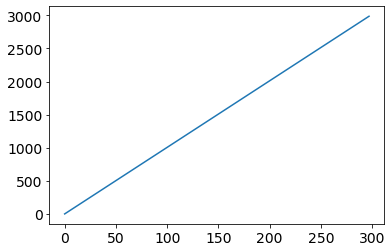

In [26]:
plt.figure()
plt.plot(t)

In [29]:
t[0:10]

array([ 1.97, 12.02, 22.06, 32.11, 42.16, 52.21, 62.26, 72.3 , 82.35,
       92.4 ])

In [30]:
dt_array = t[1:]-t[0:-1]

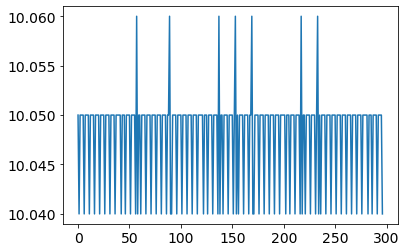

In [31]:
plt.figure()
plt.plot(dt_array)

In [32]:
v_in = float_array[:,-2]
v_out = float_array[:,-1]

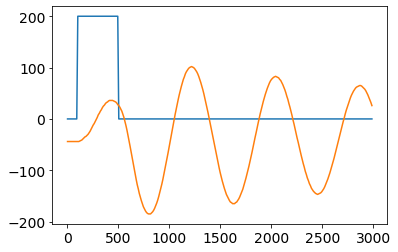

In [33]:
plt.figure()
plt.plot(t, v_in, t, v_out)
#plt.ylim([-5,260])
#plt.xlim([0,2000])
#plt.legend(['ax','ay','az'])

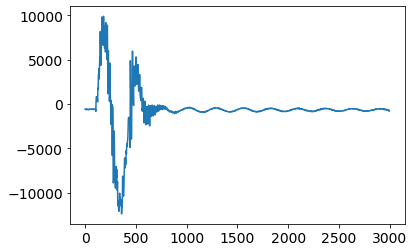

In [181]:
plt.figure()
plt.plot(t, az)
#plt.ylim([-5,260])
#plt.xlim([0,2000])
#plt.legend(['ax','ay','az'])

In [34]:
ser.close()

In [34]:
data_out = float_array

In [359]:
np.savetxt(fn,data_out,delimiter=',')